In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
x=df.iloc[:,2:]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [5]:
#k value
#elbow points
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    data=KMeans(n_clusters=i,init='k-means++',random_state=42)
    data.fit(x)
    wcss.append(data.inertia_)


c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

In [6]:
print(wcss)

[308812.77999999997, 212840.16982097185, 143342.75157170603, 104366.15145556197, 75350.77917248776, 58300.44332159069, 51133.03138528138, 44640.028048530425, 40809.75122720595, 37128.00867935385]


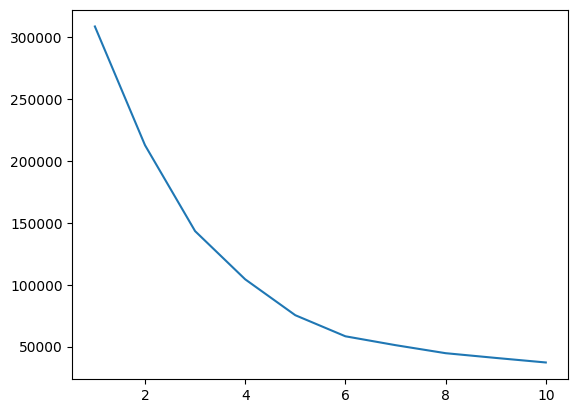

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [8]:
data1=KMeans(n_clusters=7,init='k-means++',random_state=42)
data1.fit(x)
y_pred=data1.predict(x)
y_pred

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 2,
       5, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6])

In [9]:
#x 
x['clusters']=y_pred
x

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,5
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,5
...,...,...,...,...
195,35,120,79,6
196,45,126,28,4
197,32,126,74,6
198,32,137,18,4


In [10]:
x['clusters'].value_counts()

clusters
1    44
2    39
4    34
3    28
5    22
0    22
6    11
Name: count, dtype: int64

In [11]:
data1=x.iloc[:,:-1].values
data2=x.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1,data2,test_size=0.30,random_state=42)
x_train

array([[ 32,  87,  63],
       [ 27,  60,  50],
       [ 21,  30,  73],
       [ 58,  20,  15],
       [ 21,  33,  81],
       [ 50,  67,  57],
       [ 48,  39,  36],
       [ 36, 103,  85],
       [ 68,  59,  55],
       [ 44,  73,   7],
       [ 33,  42,  60],
       [ 40,  71,  95],
       [ 19,  81,   5],
       [ 24,  38,  92],
       [ 51,  67,  43],
       [ 19,  64,  46],
       [ 45,  28,  32],
       [ 35,  74,  72],
       [ 23,  62,  41],
       [ 19,  63,  54],
       [ 20,  16,   6],
       [ 40,  54,  48],
       [ 50,  40,  55],
       [ 28, 101,  68],
       [ 32, 103,  69],
       [ 48,  54,  46],
       [ 29,  79,  83],
       [ 42,  34,  17],
       [ 34, 103,  23],
       [ 19,  46,  55],
       [ 46,  25,   5],
       [ 32,  75,  93],
       [ 49,  62,  48],
       [ 18,  33,  92],
       [ 35,  19,  99],
       [ 47, 120,  16],
       [ 30,  78,  73],
       [ 35,  18,   6],
       [ 35,  28,  61],
       [ 27,  67,  56],
       [ 31,  17,  40],
       [ 53,  33

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([2, 0, 5, 4, 4, 2, 2, 4, 4, 0, 1, 4, 3, 2, 4, 3, 1, 4, 1, 2, 2, 5,
       4, 2, 2, 1, 2, 1, 3, 2, 0, 5, 1, 2, 4, 1, 3, 3, 4, 1, 1, 6, 5, 5,
       2, 6, 0, 0, 3, 1, 2, 3, 0, 1, 1, 1, 4, 1, 4, 1])

In [15]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9833333333333333

In [16]:
print(knn.predict)

<bound method KNeighborsClassifier.predict of KNeighborsClassifier(n_neighbors=7)>
